## Working with OLC in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/09_olc.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/09_olc.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/09_olc.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/09_olc.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [20]:
# %pip install vgrid --upgrade

### latlon2olc

In [21]:
from vgrid.conversion.latlon2dggs import latlon2olc

lat = 10.775276
lon = 106.706797
res = 8
olc_id = latlon2olc(lat, lon, res)
olc_id

'7P28QPG4+'

### OLC to Shapely Polygon

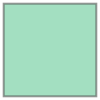

In [22]:
from vgrid.conversion.dggs2geo.olc2geo  import olc2geo

olc_geo = olc2geo(olc_id)
olc_geo

### OLC to GeoJSON        

In [23]:
from vgrid.conversion.dggs2geo.olc2geo import olc2geojson

olc_geojson = olc2geojson(olc_id)
olc_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.705, 10.775),
      (106.7075, 10.775),
      (106.7075, 10.7775),
      (106.705, 10.7775),
      (106.705, 10.775)),)},
   'properties': {'olc': '7P28QPG4+',
    'resolution': 8,
    'center_lat': 10.77625,
    'center_lon': 106.70625,
    'cell_width': 273.424,
    'cell_height': 276.533,
    'cell_area': 75610.384,
    'cell_perimeter': 1099.911}}]}

### Vector to OLC

Processing features: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]


<Axes: >

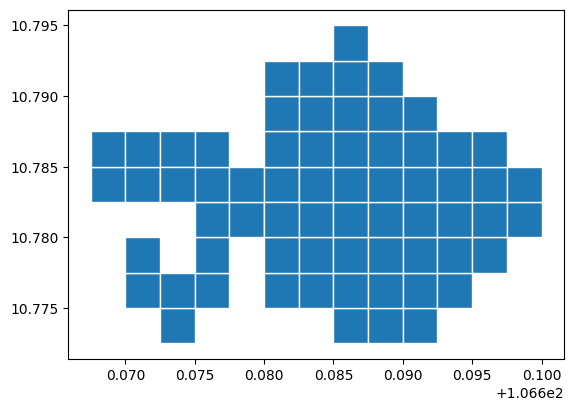

In [24]:
from vgrid.conversion.vector2dggs.vector2olc import vector2olc

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_olc = vector2olc(file_path, resolution=8, compact=False, 
                            predicate = "intersects",output_format="gpd")
# Visualize the output
vector_to_olc.plot(edgecolor="white")

### OLC Compact

<Axes: >

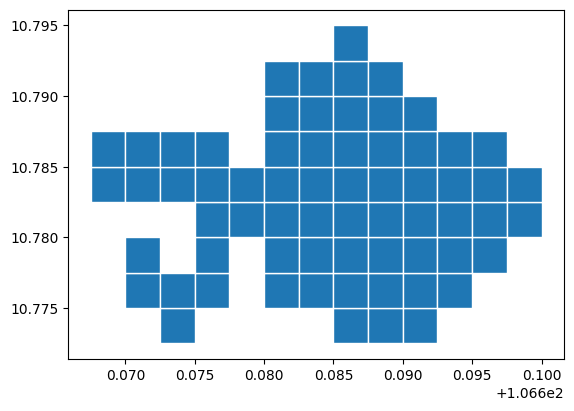

In [25]:
from vgrid.conversion.dggscompact.olccompact import olccompact

olc_compacted = olccompact(vector_to_olc, olc_id="olc", output_format="gpd")
olc_compacted.plot(edgecolor="white")

### OLC Expand

<Axes: >

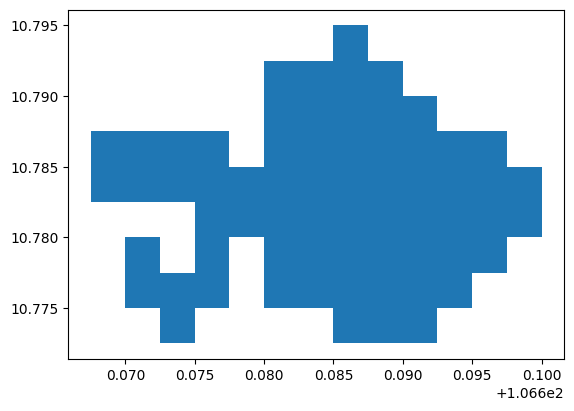

In [26]:
from vgrid.conversion.dggscompact.olccompact import olcexpand

olc_expanded = olcexpand(vector_to_olc, resolution=10, output_format="gpd")
olc_expanded.plot()

### OLC Binning

<Axes: >

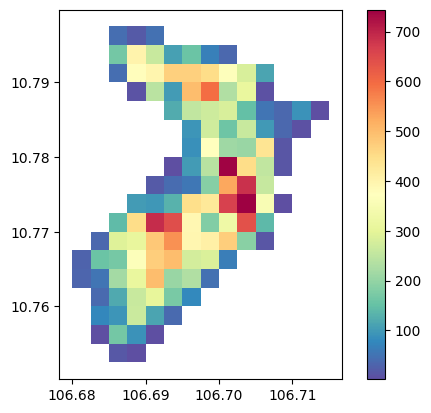

In [27]:
from vgrid.binning.olcbin import olcbin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
olc_bin =  olcbin(file_path, resolution=8, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
olc_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)   

### Raster to OLC

In [28]:
# %pip install folium

In [29]:
from vgrid.conversion.raster2dggs.raster2olc    import raster2olc
from vgrid.utils.io import download_file          

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_olc =  raster2olc(raster_file,output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

olc_layer = folium.GeoJson(
    raster_to_olc,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["olc", "band_1", "band_2", "band_3"],
        aliases=["OLC ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(olc_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest olc resolution determined: 12


Converting raster to OLC: 100%|██████████| 6478/6478 [00:00<00:00, 6720.02 cells/s]


### OLC Generator

Generating OLC DGGS: 100%|██████████| 162/162 [00:00<00:00, 3480.27 cells/s]


<Axes: >

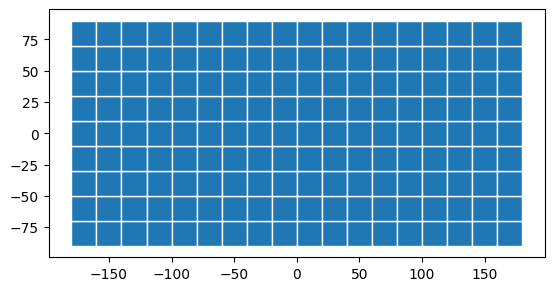

In [30]:
from vgrid.generator.olcgrid import olcgrid
olc_grid = olcgrid(resolution=2,output_format="gpd")
# olc_grid = olcgrid(resolution=8,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
olc_grid.plot(edgecolor="white")

### OLC Inspect

In [31]:
from vgrid.stats.olcstats import olcinspect 
resolution = 4
olc_inspect = olcinspect(resolution)    
olc_inspect.head()

Generating OLC DGGS: 100%|██████████| 64800/64800 [00:24<00:00, 2649.47 cells/s]


olc  resolution  center_lat  center_lon  cell_width  cell_height  \
0  22220000+           4       -89.5      -179.5         0.0   111693.865   
1  22230000+           4       -89.5      -178.5         0.0   111693.865   
2  22240000+           4       -89.5      -177.5         0.0   111693.865   
3  22250000+           4       -89.5      -176.5         0.0   111693.865   
4  22260000+           4       -89.5      -175.5         0.0   111693.865   

      cell_area  cell_perimeter  \
0  1.088612e+08      225337.032   
1  1.088612e+08      225337.032   
2  1.088612e+08      225337.032   
3  1.088612e+08      225337.032   
4  1.088612e+08      225337.032   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 -90, -180 -89, -179 -89, -179 -...    False    0.01383   
1  POLYGON ((-179 -90, -179 -89, -178 -89, -178 -...    False    0.01383   
2  POLYGON ((-178 -90, -178 -89, -177 -89, -177 -...    False    0.01383   
3  POLYGON ((-177 -90, -177 -89, -176 -89, -176 -...    False    0.01383   
4  POLYGON ((-176 -90, -176 -89, -175 -89, -175 -...    False    0.01383   

        ipq       zsc  
0  0.026941  0.164138  
1  0.026941  0.164138  
2  0.026941  0.164138  
3  0.026941  0.164138  
4  0.026941  0.164138

### Distribution of OLC Area Distortions

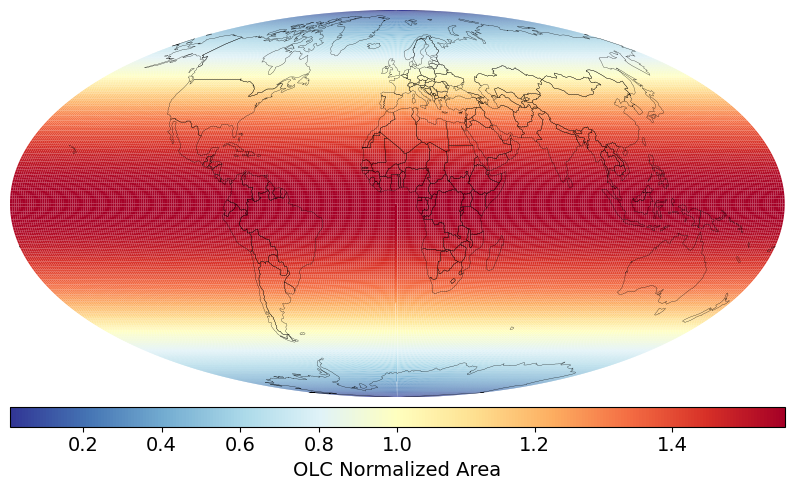

In [32]:
from vgrid.stats.olcstats import olc_norm_area
olc_norm_area(olc_inspect)

### Distribution of OLC IPQ Compactness

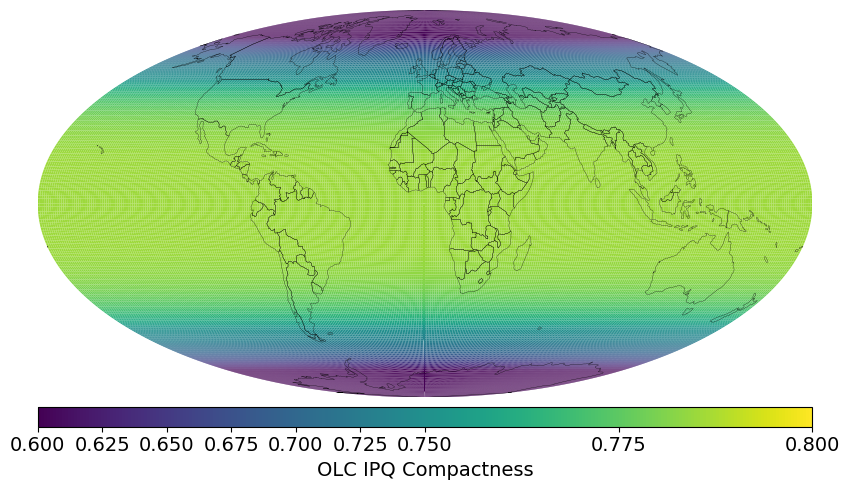

In [33]:
from vgrid.stats.olcstats import olc_compactness
olc_compactness(olc_inspect)

### OLC Statistics

In [34]:
from vgrid.stats import olcstats
olcstats('km')

resolution       number_of_cells  avg_edge_len_km  avg_cell_area_km2
0           2                   162      1774.416309       3.148553e+06
1           4                 64800        88.720815       7.871383e+03
2           6              25920000         4.436041       1.967846e+01
3           8           10368000000         0.221802       4.919614e-02
4          10         4147200000000         0.011090       1.229904e-04
5          11        82944000000000         0.002480       6.149518e-06
6          12      1658880000000000         0.000555       3.074759e-07
7          13     33177600000000000         0.000124       1.537380e-08
8          14    663552000000000000         0.000028       7.686898e-10
9          15  13271040000000000000         0.000006       3.843449e-11